In [46]:
import pandas as pd # manipulação de dados
import matplotlib.pyplot as plt # visualização dos dados
from scipy import stats # funções estatísticas
from datetime import datetime as dt
import numpy as np
import math

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def convhora(str_date):
    data = []
    for i in range(len(str_date)):
        if(i>10):
            data.append(str_date[i])
#     return ('{}{}{}{}{}'.format(data[0],data[1],data[2],data[3],data[4]))
    return ('%d%d' % (int(data[0]),int(data[1])))


def convdata(str_date):
    data = []
    for i in range(len(str_date)):
        if(i<10):
            data.append(str_date[i])
    return ('{}{}{}{}{}{}{}{}{}{}'.format(data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9]))

def status (valor):
    if(valor > 70 and valor < 180):
        return 2
    elif(valor < 70):
        return 1
    else:
        return 3

convhora1 = lambda x:convhora(x)
convdata1 = lambda x:convdata(x)
status1 = lambda x:status(x)

def histo(values):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    _ = ax1.hist(values)
    fig.show()
    
def distEuclidiana_np(v1,v2):
    v1,v2 = np.array(v1),np.array(v2)
    diferenca = v1 - v2
    quadrado_distancia = np.dot(diferenca,diferenca)
    return math.sqrt(quadrado_distancia)

In [0]:
database = pd.read_csv('/content/drive/My Drive/Colab Notebooks/analise de dados/database.csv')

db = pd.DataFrame({
    'Data':[convdata1(i) for i in database['data_hora']],
    'Hora':[convhora1(i) for i in database['data_hora']],
    'Glicose':database['glicose'],
    'Status':[status1(i) for i in database['glicose']]   
})
# db


In [0]:
amostras = []
for i in range(len(db)):
#     amostras.append([db.Hora[i],db.Glicose[i],db.Status[i]])
#     amostras.append([int(db.Hora[i]),db.Glicose[i],db.Status[i]])
    amostras.append([int(db.Hora[i]),db.Status[i]])

# amostras
#            

In [0]:
def infoDataSet(amostras, verbose=True):
    if verbose:
        print('Total de amostras: {}'.format(len(amostras)))
    rotulo1, rotulo2,rotulo3 = 0,0,3
    for amostra in amostras:
        if amostra[-1] == 1:
            rotulo1 += 1
        elif amostra[-1] == 2:
            rotulo2 += 1
        else:
            rotulo3 +=1
    if verbose:
        print('Total de rotulo 1: {}'.format(rotulo1))
        print('Total de rotulo 2: {}'.format(rotulo2))
        print('Total de rotulo 3: {}'.format(rotulo3))

    return (len(amostras), rotulo1, rotulo2,rotulo3)

In [58]:
infoDataSet(amostras)

Total de amostras: 10547
Total de rotulo 1: 130
Total de rotulo 2: 7155
Total de rotulo 3: 3265


(10547, 130, 7155, 3265)

In [0]:
p = 0.6
_, rotulo1, rotulo2,rotulo3 = infoDataSet(amostras, verbose=False)

In [0]:
treinamento, teste = [],[]
max_rotulo1, max_rotulo2,max_rotulo3 = int(p* rotulo1) , int(p*rotulo2), int(p*rotulo3)
total_rotulo1, total_rotulo2,total_rotulo3 = 0,0,0
for amostra in amostras:
    if(total_rotulo1 + total_rotulo2 + total_rotulo3)< (max_rotulo1 + max_rotulo2 + max_rotulo3):
        treinamento.append(amostra)
        if amostra[-1] == 1 and total_rotulo1 < max_rotulo1 :
            total_rotulo1 +=1
        elif amostra[-1] == 2 and total_rotulo2 < max_rotulo2 :
            total_rotulo2 +=1
        else:
            total_rotulo3 +=1
    else: teste.append(amostra)

In [0]:
def knn(treino, nova_amostra,k):
    distancia, tamTreino = {}, len(treino)
    
    #calcula a distancia euclidiana da nova amostra 
    #para todos os outros conjuntos de treinamento
    for i in range(tamTreino):
        d = distEuclidiana_np(treinamento[i], nova_amostra)
        distancia[i] = d       
        
    #obtem as chaves (indices) dos k-vizinhos mais próximos
    kVizihos = sorted(distancia,key=distancia.get)[:k]
    
    #votação marjoritaria
    qnt_rotulo1, qnt_rotulo2,qnt_rotulo3 = 0,0,0
    
    for indice in kVizihos:
        if(treinamento[indice][-1] == 1):
            qnt_rotulo1 += 1
        elif (treinamento[indice][-1] == 2):
            qnt_rotulo2 += 2
        else: 
            qnt_rotulo3 += 3

            
    if qnt_rotulo1 > qnt_rotulo2 and qnt_rotulo1 > qnt_rotulo3:
        return 1
    elif qnt_rotulo2 > qnt_rotulo1 and qnt_rotulo2 > qnt_rotulo3:
        return 2
    else:
        return 3
        
        

In [62]:
i = 11
ex_teste = [21,3]
print(ex_teste)
print(knn(treinamento, ex_teste,k=13))

[21, 3]
3


In [0]:
%%time 
acertos, k, erros = 0,13,[]
for amostra in teste:
    classe = knn(treinamento,amostra, k)
    if(amostra[-1] == classe):
        acertos +=1
    else:
        erros.append(amostra)

    
print('Total de treinamento {}'.format(len(treinamento)))
print('Total de teste {}'.format(len(teste)))
print('Total de acertos {}'.format(acertos))
print('Porcentagem de Acertos {}'.format(100*acertos / len(teste)))
print(erros)
    

Total de treinamento 6330
Total de teste 4217
Total de acertos 4148
Porcentagem de Acertos 98.36376571022053
[[10, 1], [10, 1], [0, 1], [0, 1], [0, 1], [1, 1], [1, 1], [12, 1], [12, 1], [12, 1], [3, 1], [3, 1], [4, 1], [4, 1], [4, 1], [4, 1], [5, 1], [5, 1], [5, 1], [5, 1], [23, 1], [0, 1], [0, 1], [0, 1], [9, 1], [9, 1], [10, 1], [10, 1], [10, 1], [10, 1], [11, 1], [11, 1], [0, 1], [14, 1], [14, 1], [14, 1], [15, 1], [15, 1], [15, 1], [15, 1], [16, 1], [16, 1], [16, 1], [16, 1], [18, 1], [18, 1], [18, 1], [18, 1], [19, 1], [0, 1], [0, 1], [0, 1], [22, 1], [22, 1], [23, 1], [23, 1], [4, 1], [4, 1], [5, 1], [5, 1], [5, 1], [6, 1], [4, 1], [4, 1], [4, 1], [4, 1], [5, 1], [5, 1], [5, 1]]
CPU times: user 1min 45s, sys: 109 ms, total: 1min 45s
Wall time: 1min 45s


In [0]:
erros = [[10, 1], [10, 1], [0, 1], [0, 1], [0, 1], [1, 1], [1, 1], [12, 1], [12, 1], [12, 1], [3, 1], [3, 1], [4, 1], [4, 1], [4, 1], [4, 1], [5, 1], [5, 1], [5, 1], [5, 1], [23, 1], [0, 1], [0, 1], [0, 1], [9, 1], [9, 1], [10, 1], [10, 1], [10, 1], [10, 1], [11, 1], [11, 1], [0, 1], [14, 1], [14, 1], [14, 1], [15, 1], [15, 1], [15, 1], [15, 1], [16, 1], [16, 1], [16, 1], [16, 1], [18, 1], [18, 1], [18, 1], [18, 1], [19, 1], [0, 1], [0, 1], [0, 1], [22, 1], [22, 1], [23, 1], [23, 1], [4, 1], [4, 1], [5, 1], [5, 1], [5, 1], [6, 1], [4, 1], [4, 1], [4, 1], [4, 1], [5, 1], [5, 1], [5, 1]]

In [0]:
# aux = []
# for i in erros:
#     aux.append(i[0])
# histo(aux)

#KNN com SKLEAN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
entradas, saidas = [],[]

In [0]:
amostras = []
for i in range(len(db)):
    entradas.append([int(db.Hora[i]),int(db.Glicose[i])])
    saidas.append(int(db.Status[i]))

In [0]:
p = 0.9
limite = int(p * len(entradas))

In [65]:
%%time 

knn  = KNeighborsClassifier(n_neighbors = 15)

knn.fit(entradas[:limite],saidas[:limite])

labels = knn.predict(entradas[limite:])

acertos, indice_label,erros = 0,0,[]
for i in range(limite,len(entradas)):
    if(labels[indice_label] == saidas[i]):
        acertos+=1
    indice_label+=1

print('Total de treinamento {}'.format(limite))
print('Total de teste {}'.format(len(entradas)))
print('Total de acertos {}'.format(acertos))
print('Porcentagem de Acertos %.2f' % (100*acertos / (len(entradas) - limite)))

Total de treinamento 9492
Total de teste 21094
Total de acertos 11563
Porcentagem de Acertos 99.66
CPU times: user 333 ms, sys: 2.99 ms, total: 336 ms
Wall time: 338 ms


In [0]:
def knn_treiner(entradas,saidas,limite,k):
    knn  = KNeighborsClassifier(n_neighbors = k)

    knn.fit(entradas[:limite],saidas[:limite])

    labels = knn.predict(entradas[limite:])

    acertos, indice_label,erros = 0,0,[]
    for i in range(limite,len(entradas)):
        if(labels[indice_label] == saidas[i]):
            acertos+=1
        indice_label+=1

    print('Total de treinamento {}'.format(limite))
    print('Total de teste {}'.format(len(entradas)))
    print('Total de acertos {}'.format(acertos))
    print('Porcentagem de Acertos %.2f' % (100*acertos / (len(entradas) - limite)))

In [70]:
knn_treiner(entradas,saidas,limite,k=15)

Total de treinamento 9492
Total de teste 21094
Total de acertos 11563
Porcentagem de Acertos 99.66


##Melhor K

In [71]:

%%time 
ks = {}
for k in range(1,100):
    
    knn  = KNeighborsClassifier(n_neighbors = k)
    knn.fit(entradas[:limite],saidas[:limite])
    labels = knn.predict(entradas[limite:])
    
    acertos, indice_label,erros = 0,0,[]
    
    for i in range(limite,len(entradas)):
        if(labels[indice_label] == saidas[i]):
            acertos+=1
        indice_label+=1
    ks[k] = acertos 

orde = sorted(ks,key=ks.get)
# print(orde)
print('Total de treinamento {}'.format(limite))
print('Total de teste {}'.format(len(entradas)))
print('Total de acertos {}'.format(acertos))
print('Porcentagem de Acertos %.2f' % (100*acertos / (len(entradas) - limite)))
print("Melhor K:",orde[-1])


Total de treinamento 9492
Total de teste 21094
Total de acertos 11528
Porcentagem de Acertos 99.36
Melhor K: 1
CPU times: user 36.6 s, sys: 81.9 ms, total: 36.7 s
Wall time: 36.7 s


In [0]:
hora1 = dt.strptime('19:00','%H:%M')
hora2 = dt.strptime('19:30','%H:%M')

dif = hora2 - hora1

print(dif)
# if(a > 0):
#     print ('maior q 3')
    
# h1 = '2019/08/16 19:00:00'
# h2 = '2019/08/16 19:30:00'

# # date1 = int(dt.strptime(h1,'%d/%m/%Y %H:%M:%S').strftime("s"))
# a = dt.strptime(h1,'%H:%M').strftime('%H:%M')
# # b = dt.strptime(h2,'%H:%M').strftime('%H:%M')

# # type(a)
# a
# # if(dt.strptime(value,'%H:%M')):
# #     print ('maior q 3')

0:30:00


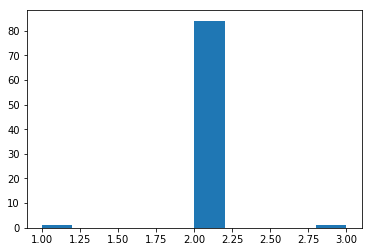

In [0]:
values = [db['Status'][:86]]
histo(values)

In [0]:
# crosstab = pd.crosstab(db['G'], db['Hora'])
# result = stats.chi2_contingency(crosstab)
# if result[1] > 0.05:
#     print('Não existe relação entre a variável Gênero e a variável Etnia.')
# else:
#     print('Existe uma relação entre a variável Gênero e a variável Etnia.')
# print('P-valor:', result[1])
# crosstab

In [0]:
# values = [db['G'][:83]]
# histo(values)

In [0]:
# plt.plot(db.Hora[:83],db['G'][:83])
# plt.ylabel('Glicose medida (mg/dL)')
# plt.xlabel('Hora')
# plt.show()

In [0]:
# dia
# lista

#### valores